# Lending Club Research Project - EDA and Problem Statement

- [Introduction](#Introduction)
- [Data Cleaning and EDA](#Data_Cleaning)
   - [Patterns in Variables/ Variables Trend Detection](#Trend_Analysis)
- [Outliers and Observing some common Trends](#Outlier)
- [Problem Statement](#Problem Statement)

In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [329]:
%matplotlib inline

# Introduction

##### Lending Club is a platform that connects lenders with investors. They were founded in 2007 in San Francisco. Since, then they have been helping out people with finding suitable borrowers for their needs. They use complex algorithms and a thorough reserach of people's background before determining to connect them with potential investors.

In [330]:
loan_Q4=pd.read_csv("E:\\Research Project\\LoanStats_2017Q4\\LoanStats_2017Q4.csv")
loan_Q3=pd.read_csv("E:\\Research Project\\LoanStats_2017Q4\\LoanStats_2017Q3.csv")
loan_Q2=pd.read_csv("E:\\Research Project\\LoanStats_2017Q4\\LoanStats_2017Q2.csv")
loan_Q1=pd.read_csv("E:\\Research Project\\LoanStats_2017Q4\\LoanStats_2017Q1.csv")

C:\Users\Isha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Isha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Isha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (112) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [331]:
loan_Q4['quarter']='Q4'
loan_Q3['quarter']='Q3'
loan_Q2['quarter']='Q2'
loan_Q1['quarter']='Q1'

In [332]:
loan=pd.concat([loan_Q4,loan_Q3,loan_Q2,loan_Q1],axis=0).reset_index()

In [333]:
len(loan)

443579

# Data_Cleaning

In [342]:
print("Total Rows in the dataset:" ,loan.shape[0])
print("Total columns in the dataset:",loan.shape[1])

Total Rows in the dataset: 443579
Total columns in the dataset: 147


This dataset has 147 columns, some of which don't convey a lot of information, we will look at these as we move forward
> First Step: Identifying, the columns with null values

In [343]:
null_values=pd.DataFrame(loan.isnull().sum()).reset_index()
null_values.rename(columns={'index': 'RowNames', 0: 'Blank RowCount'},inplace=True)

In [344]:
null_values['Percent Blank Values']=(null_values['Blank RowCount']/len(loan))*100

In [323]:
#sb.set(rc={'figure.figsize':(60,50)})
#sb.barplot(x=null_values['RowNames'],y=null_values['Percent Blank Values'])

###### There are 43 columns with more than 50 percent blank values, and for any of these it is hard for us to determine the missing values. So we will just remove these from our dataframe 

In [348]:
null_values[null_values['Percent Blank Values'] >=50.00].count()

RowNames                43
Blank RowCount          43
Percent Blank Values    43
dtype: int64

In [349]:
null_values[null_values['Percent Blank Values'] >=50.00]

,RowNames,Blank RowCount,Percent Blank Values
1,id,443579,100.000000
2,member_id,443579,100.000000
19,url,443579,100.000000
20,desc,443579,100.000000
29,mths_since_last_delinq,222680,50.200753
30,mths_since_last_record,367384,82.822676
51,mths_since_last_major_derog,324968,73.260456
54,annual_inc_joint,401154,90.435751
55,dti_joint,401154,90.435751
56,verification_status_joint,401160,90.437104


In [350]:
columns_removed=null_values[null_values['Percent Blank Values']>=50.00]

In [351]:
RemovedData=loan[columns_removed['RowNames']]

In [352]:
col=columns_removed['RowNames']
columns_notremoved=null_values[null_values['Percent Blank Values']<50.00]

##### New dataset after removing the columns with null values over 50 percent

In [353]:
df1=loan[columns_notremoved['RowNames']].reset_index()

In [426]:
null_values[(null_values['Percent Blank Values']>0.00) & (null_values['Percent Blank Values']<50.00)]

,RowNames,Blank RowCount,Percent Blank Values
11,emp_title,32344,7.291599
23,zip_code,1,0.000225
25,dti,514,0.115876
34,revol_util,444,0.100095
46,last_pymnt_d,619,0.139547
48,next_pymnt_d,44040,9.928333
49,last_credit_pull_d,11,0.002480
64,mths_since_rcnt_il,13126,2.959112
66,il_util,61794,13.930777
70,all_util,67,0.015104


#### Using k nearest neighbor to find the values for some important columns   

### Debt to Income Ratio

In [432]:
blank_dti=df1[df1['dti'].isnull()]

In [443]:
notblank_dti=df1[pd.notnull(df1['dti'])]

In [445]:
len(notblank_dti['dti'])+len(blank_dti)

443579

In [446]:
len(df1)

443579

In [447]:
from sklearn.cross_validation import train_test_split

C:\Users\Isha\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [466]:
x=notblank_dti[['int_rate','revol_bal','annual_inc']]
y=notblank_dti['dti']

In [533]:
p,q=x.shape
n=y.shape


In [467]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=1)

In [482]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression

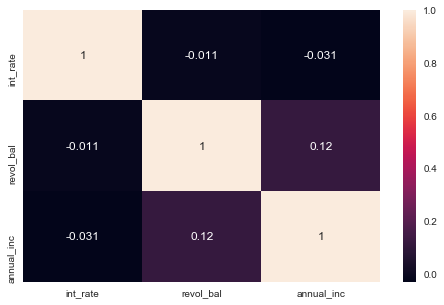

In [480]:
sb.heatmap(x.corr(),annot=True)

In [516]:
import statsmodels.api as sm

In [535]:
model=sm.OLS(y_train,x_train)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dti   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                 1.297e+05
Date:                Mon, 12 Mar 2018   Prob (F-statistic):               0.00
Time:                        05:31:58   Log-Likelihood:            -1.5262e+06
No. Observations:              354452   AIC:                         3.052e+06
Df Residuals:                  354449   BIC:                         3.052e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
int_rate       1.1837      0.003    464.237      0.000       1.179       1.189
revol_bal      0.0001   1.27e-06     94.852      0.000       0.000       0.000
annual_inc -1.122e-06   1.33e-07     -8.446      0.000   -1.38e-06   -8.62e-07
==============================================================================
Omnibus:                   897471.861   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      28703702327.716
Skew:                          28.102   Prob(JB):                         0.00
Kurtosis:                    1395.973   Cond. No.                     2.03e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [538]:
y_train_pred=result.predict(x_train)
y_test_pred=result.predict(x_test)

In [539]:
print("The rsquared value for this model is",result.rsquared)

The rsquared value for this model is 0.523301858696


In [541]:
x_blank=blank_dti[['int_rate','revol_bal','annual_inc']]
y_blank=blank_dti['dti']

In [545]:
blank_dti['dti']=result.predict(x_blank)

C:\Users\Isha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [604]:
#blank_dti['dti']

In [554]:
df1=pd.concat([blank_dti,notblank_dti],axis=0)

In [556]:
df1[df1['dti'].isnull()]

,level_0,index,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,quarter


In [356]:
df1['int_rate']=(df1['int_rate'].astype(float))

# Trend_Analysis

Looking at some important variables

### Interest Rate

Text(0.5,1,' Distribution of Interest Rate')

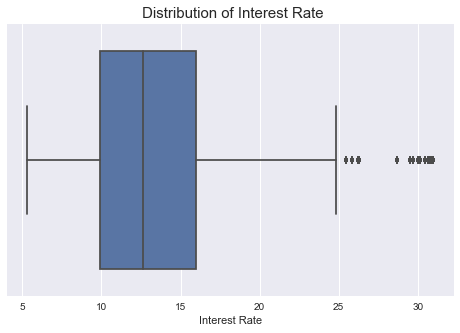

In [428]:
sb.set(rc={'figure.figsize':(8,5)})
sb.set_style("darkgrid")
sb.boxplot(x=df1['int_rate'])
plt.xlabel("Interest Rate")
plt.title(" Distribution of Interest Rate",fontsize=15)

In [357]:
pd.DataFrame(df1['int_rate'].describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
int_rate,443579.0,13.246129,5.189064,5.32,9.93,12.62,15.99,30.99


In [220]:
df1['term']=(df1['term'].str.replace('months', ''))

In [221]:
df1['term']=df1['term'].astype(int)

In [48]:
#df1

In [222]:
pd.DataFrame(df1['term'].describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
term,443579.0,42.663616,10.748175,36.0,36.0,36.0,60.0,60.0


In [322]:
#df1[df1['loan_amnt']!=df1['funded_amnt_inv']]

In [224]:
(df1['loan_amnt']-df1['funded_amnt_inv']).sum()

1872236.55784

#### Every loan that is given out, is assigned a grade based on the borrowers's credit history, debt to income ratio, the purpose of the loan

In [381]:
grade=pd.DataFrame(df1.groupby(['grade'])['int_rate'].count()).reset_index()
grade=grade.rename(columns={'int_rate': 'Count'})
grade

,grade,Count
0,A,78796
1,B,133127
2,C,145144
3,D,56646
4,E,20167
5,F,6242
6,G,3457


Text(0,0.5,'Count of each grade')

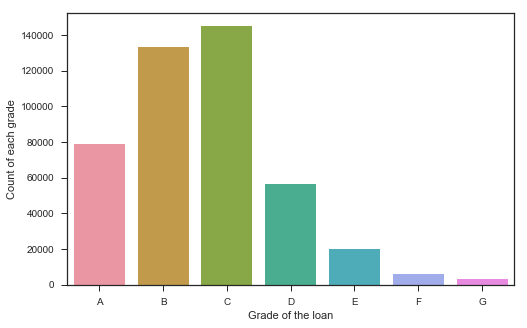

In [399]:
sb.set(rc={'figure.figsize':(8,5)})
sb.set_style("ticks")
sb.barplot(x=grade['grade'],y=grade['Count'])
plt.xlabel("Grade of the loan")
plt.ylabel("Count of each grade")
#grade.plot(kind='bar',color="Maroon")

#### As the grades progresses from A to G, the interest rate keeps increasing, Lendingg Club also sub divides this category into multiple instances

In [411]:
subgrade=pd.DataFrame(df1.groupby(['grade','sub_grade'])['int_rate'].count()).reset_index()
subgrade=subgrade.rename(columns={'int_rate': 'Count'})

In [412]:
subgrade['sub_grade']=subgrade['sub_grade'].str.replace('[A-Z]','')

In [420]:
subgrade.head()

,grade,sub_grade,Count
0,A,1,16266
1,A,2,13458
2,A,3,14447
3,A,4,14964
4,A,5,19661


#### Number of loans given out by every grade and sub grade

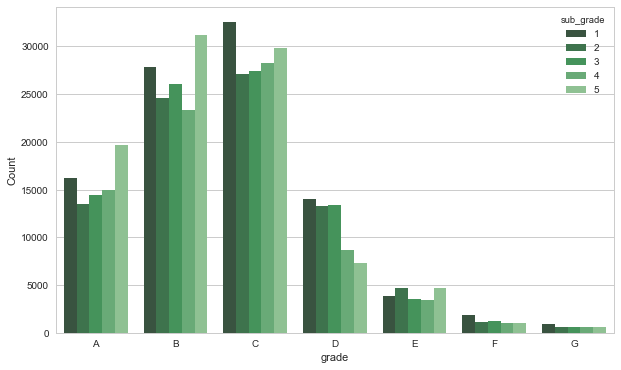

In [419]:
sb.set(rc={'figure.figsize':(10,6)})
sb.set_style("whitegrid")
sb.barplot(x="grade", y="Count", hue="sub_grade", data=subgrade, palette="Greens_d");

#### Grade, has a direct relation with the interest rest the borrower is given out the money on

In [421]:
#sb.barplot(x=df1['grade'],y=df1['int_rate'])

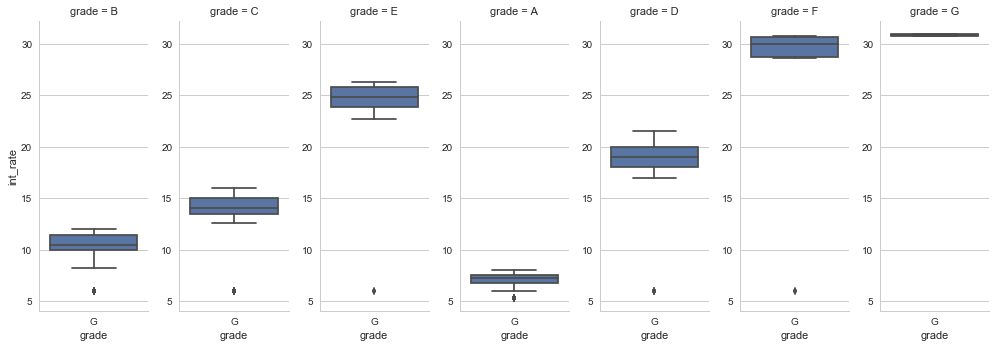

In [424]:
g = sb.FacetGrid(df1, col="grade", size=5, aspect=.4)
g.map(sb.boxplot, "grade", "int_rate");

In [228]:
pd.DataFrame(df1.groupby(['quarter'])['loan_amnt'].count()).reset_index()

,quarter,loan_amnt
0,Q1,96779
1,Q2,105451
2,Q3,122701
3,Q4,118648


In [274]:
state=df1.groupby(['addr_state'])['loan_amnt'].count().reset_index()

In [257]:
#state.dtypes
state['addr_state']=state['addr_state'].to_string()

In [270]:
state.dtypes
#flights.pivot("month", "year", "passengers")
#state=state.pivot("addr_state","loan_amnt")

Text(0,0.5,'Count')

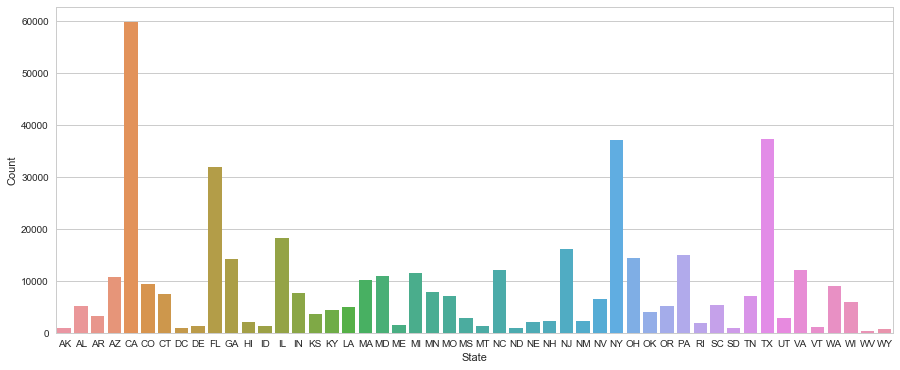

In [605]:
sb.set(rc={'figure.figsize':(15,6)})
sb.set_style("whitegrid")
sb.barplot(x=state['addr_state'],y=state['loan_amnt'])
plt.xlabel("State")
plt.ylabel("Count")

In [577]:
loanstatus=pd.DataFrame(df1.groupby(['loan_status'])['level_0'].count()).reset_index()

In [602]:
loanstatus

,loan_status,level_0
0,Charged Off,5281
2,Default,10
3,Fully Paid,38759
4,In Grace Period,4142
5,Late (16-30 days),1686
6,Late (31-120 days),6402


Text(0,0.5,'Count')

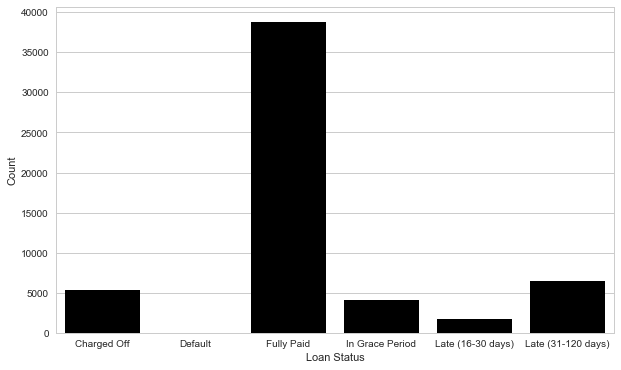

In [601]:
sb.set(rc={'figure.figsize':(10,6)})
sb.set_style("whitegrid")
sb.barplot(x="loan_status",y="level_0",data=loanstatus,color="black")
plt.xlabel("Loan Status")
plt.ylabel("Count")

In [298]:
corr=df1.corr()

In [319]:
x=corr[corr>0.7]

In [616]:
outliers=df1[df1['annual_inc']>1000000]

In [630]:
#list(outliers)
outliers=outliers.sort_values(['loan_amnt'], ascending=[True])

In [631]:
outliers[['loan_amnt','annual_inc','emp_title','int_rate','dti','grade']]

,loan_amnt,annual_inc,emp_title,int_rate,dti,grade
135164,1200,4200000.0,Business Office Manager,9.93,0.20,B
350504,1600,3100000.0,CSR,11.39,0.44,B
123842,1800,3760640.0,Usher,10.42,0.10,B
344971,2200,3650010.0,Auto tech,12.74,0.12,C
6905,3200,1080000.0,Senior sales rep,19.03,0.20,D
168893,4000,1251300.0,Supervisor,11.99,2.51,B
138034,4800,5300000.0,Clerical,7.07,0.20,A
390343,5000,4367398.0,teck 2,11.39,0.42,B
15279,5000,4680804.0,Security guard,20.00,0.05,D
16230,5000,2162772.0,Detention Deputy,19.03,0.35,D



# Future Problem Statement

#### Problem 1:
#### Finding out if a particular loan will default or not, and also the interest rate that it will be given out on.
> This is a prediction problem, that can be figured out once we have a clean set of data, and we get rid of any outliers present.

##### How to implement solution to this problem?
- Dimension Reduction
  * (Finding highly correlated variables)
  * (Use Lasso for regularization and dimension reduction)
- Implement Extreme Gradient Boosting Algorithm for regression to predict the values.
  * (Use Information Matrix to find the variables with the highest Information Gain)

###### Parameter Tuning, Variable Selection from these two methods to get a more accurate and a more regularized model.

#### Problem 2:
#### Have a Loan Scoring Algorithm
> One of the things , we found out was that even Lending Club's algorithms failed to predict in some cases if the loans should have been given out or not.
We have, all the necessary data from debt to income ratio, revolving utilization, income, total number of inquiries, total debt the person owes. All of these are some of the most important attributes that we can use to create a score and set a threshold (anything less than that threshold and the loan will default).

###### Credit Scoring [https://www.investopedia.com/terms/c/credit_score.asp]